In [1]:
!pip install PyWavelets

## Filtr Savitzky-Golay

In [2]:
import pywt
from scipy.signal import savgol_filter
import numpy as np
import matplotlib.pyplot as plt

In [13]:
x = np.linspace(0,1,200)
y = np.sin(2*np.pi*x) + np.random.normal(0, 0.2, len(x))

# wykonanie dekompozycji falkowej
coeffs = pywt.wavedec(y, 'db4', level=3)

# ustawianie progow w probkach
thres_coeffs = [pywt.threshold(c, value=0.5) for c in coeffs]

# odtworzenie sygnału z próbek po odszumieniu
filtered_signal = pywt.waverec(thres_coeffs, 'db4')

smooth_signal = savgol_filter(filtered_signal, 100, 3)

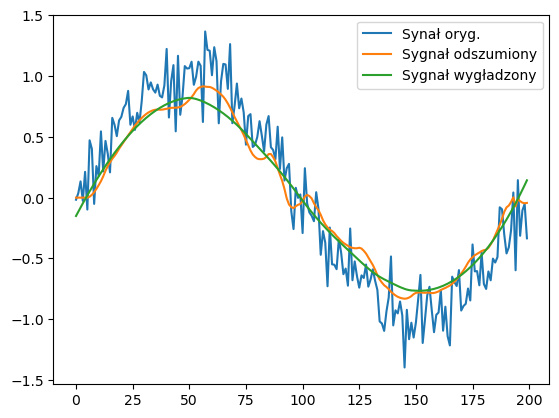

In [14]:
plt.plot(y, label="Synał oryg.")
plt.plot(filtered_signal, label="Sygnał odszumiony")
plt.plot(smooth_signal, label="Sygnał wygładzony")
plt.legend()
plt.show()

## Filtr medianowy

In [15]:
from scipy.ndimage import median_filter

In [16]:
y_median = median_filter(y, size=3)

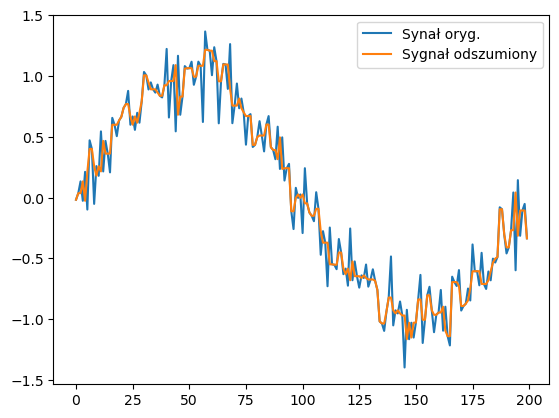

In [17]:
plt.plot(y, label="Synał oryg.")
plt.plot(y_median, label="Sygnał odszumiony")
plt.legend()
plt.show()

## Metoda szumu białego

In [18]:
y_mean = np.mean(y)
y_std = np.std(y)
noise = np.random.normal(y_mean, y_std, len(y))

y_filtered = y - noise

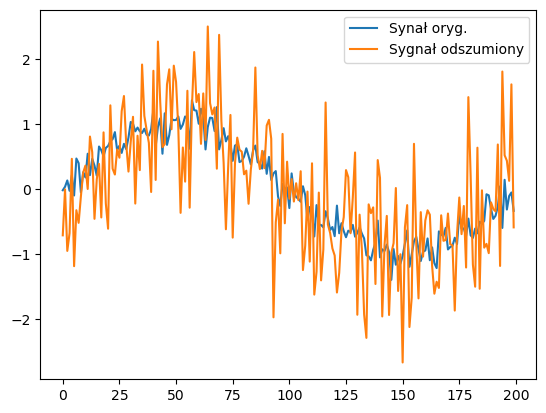

In [19]:
plt.plot(y, label="Synał oryg.")
plt.plot(y_filtered, label="Sygnał odszumiony")
plt.legend()
plt.show()

## FIR (Finite Impulse Response)

In [26]:
from scipy.signal import firwin, lfilter

# parametry filra FIR
coeffs = firwin(25, 0.05)
# filtracja sygnalu
y_fir = lfilter(coeffs, 1, y)

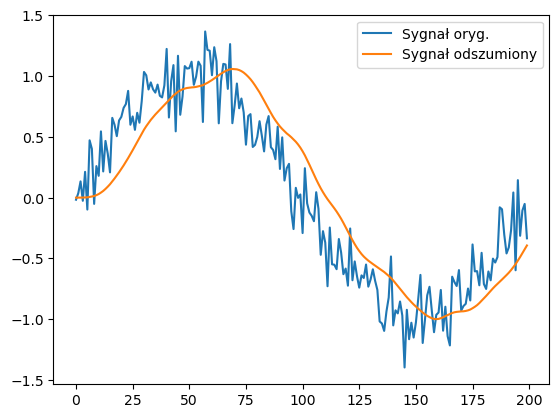

In [27]:
plt.plot(y, label="Sygnał oryg.")
plt.plot(y_fir, label="Sygnał odszumiony")
plt.legend()
plt.show()